# Instacart Market Basket Analysis
This project aims to predict the likelihood of product reordering in future Instacart orders using various machine learning models, including Logistic Regression, Random Forest, XGBoost, and Deep Learning. The goal is to help optimize inventory management and improve user experience.


In [ ]:
import pip
pip.main(['install','xgboost'])

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


Requirement already satisfied: xgboost in c:\users\gmuclass\appdata\local\anaconda3\lib\site-packages (2.1.3)

Requirement already satisfied: numpy in c:\users\gmuclass\appdata\local\anaconda3\lib\site-packages (from xgboost) (1.26.4)

Requirement already satisfied: scipy in c:\users\gmuclass\appdata\local\anaconda3\lib\site-packages (from xgboost) (1.13.1)

0

## Importing Libraries
The first step involves importing the necessary libraries for data manipulation, visualization, and machine learning model training.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay,  classification_report, roc_curve, auc
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.metrics import Recall

In [ ]:
data = pd.read_csv(r"C:\Users\GMUCLASS\Downloads\final_featured_data_with_time_revised.csv")
data.head(20)

,user_id,product_id,total_reorders_by_user,reorder_rate_by_user,mean_add_to_cart_by_user,total_orders_by_user,most_common_user_product_order_dow,total_orders_x,mean_days_since_prior,mean_order_hour,std_order_hour,most_common_order_dow,reorder_rate,total_reorders,mean_add_to_cart_order,total_orders_y,most_common_product_order_dow
0,1,196,10,0.909091,1.363636,11,4,11,19.000000,10.090909,3.477198,4,0.777843,29012,3.732399,37298,1
1,1,10258,9,0.900000,3.600000,10,4,11,19.000000,10.090909,3.477198,4,0.715610,1467,4.268293,2050,1
2,1,10326,0,0.000000,5.000000,1,4,11,19.000000,10.090909,3.477198,4,0.653439,3886,4.227846,5947,1
3,1,12427,9,0.900000,3.300000,10,4,11,19.000000,10.090909,3.477198,4,0.740182,4957,4.781245,6697,1
4,1,13032,3,0.750000,6.500000,4,4,11,19.000000,10.090909,3.477198,4,0.661117,2581,5.632172,3904,1
5,1,13176,1,0.500000,6.000000,2,4,11,19.000000,10.090909,3.477198,4,0.833755,329275,5.082916,394930,0
6,1,14084,0,0.000000,2.000000,1,2,11,19.000000,10.090909,3.477198,4,0.811336,13370,5.788215,16479,0
7,1,17122,0,0.000000,6.000000,1,4,11,19.000000,10.090909,3.477198,4,0.676907,9849,6.279863,14550,1
8,1,25133,8,0.888889,3.777778,9,4,11,19.000000,10.090909,3.477198,4,0.740364,4725,6.989345,6382,1
9,1,26088,2,0.666667,5.666667,3,3,11,19.000000,10.090909,3.477198,4,0.540429,1437,6.501692,2659,1


In [ ]:
data['target_reorder'] = (data['reorder_rate_by_user'] > 0.5).astype(int)

In [ ]:
features = [
    'mean_days_since_prior', 'mean_order_hour', 'std_order_hour',
    'reorder_rate', 'mean_add_to_cart_order', 'mean_add_to_cart_by_user'
]


In [ ]:
X = data[features]
y = data['target_reorder']

## Splitting the Data
We split the data into training and test sets, ensuring a suitable balance between train and test sizes.


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


## Feature Scaling
Scaling features for better convergence in models like Logistic Regression.


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# 1. Model Training

## 1.1 Logistic Regression Model
Training a logistic regression model to predict reorder likelihood.


In [ ]:
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

# Evaluating performance
print("Classification Report:")
print(classification_report(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.98      0.87   3178762
           1       0.56      0.10      0.17    980362

    accuracy                           0.77   4159124
   macro avg       0.67      0.54      0.52   4159124
weighted avg       0.73      0.77      0.70   4159124

Confusion Matrix:
 [[3103001   75761]
 [ 884524   95838]]


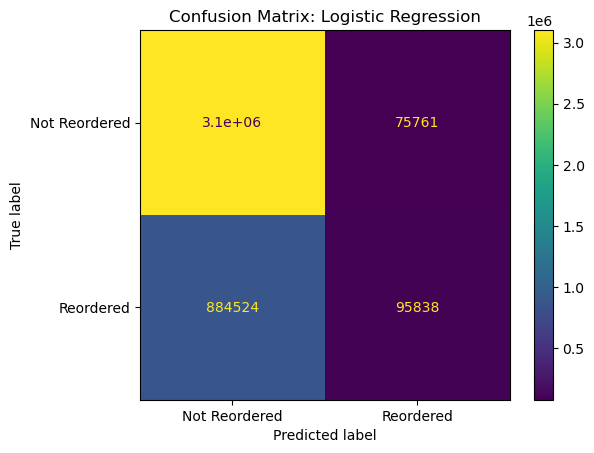

In [ ]:
ConfusionMatrixDisplay.from_estimator(log_reg, X_test, y_test, display_labels=["Not Reordered", "Reordered"])
plt.title("Confusion Matrix: Logistic Regression")
plt.show()

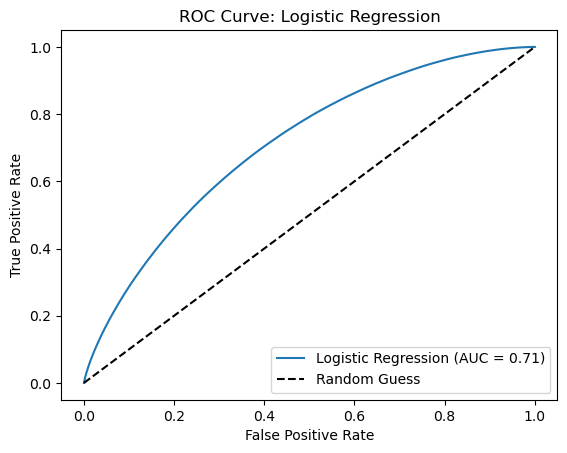

In [ ]:
y_prob = log_reg.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.title("ROC Curve: Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

## 1.2 Logistic Regression with Cross-Validation Model
Training a logistic regression model to predict reorder likelihood.

In [ ]:
logistic_model_cv = LogisticRegression(max_iter=1000, random_state=42)

logistic_cv_scores = cross_val_score(logistic_model_cv, X_train, y_train, cv=5, scoring='accuracy')
print("Logistic Regression Cross-Validation Scores:", logistic_cv_scores)
print("Mean CV Accuracy:", np.mean(logistic_cv_scores))

logistic_model_cv.fit(X_train, y_train)

y_pred_logistic = logistic_model_cv.predict(X_test)
print("Logistic Regression Performance:\n", classification_report(y_test, y_pred_logistic))


Logistic Regression Cross-Validation Scores: [0.76896531 0.76899777 0.76923671 0.76897189 0.76918107]
Mean CV Accuracy: 0.7690705521738013
Logistic Regression Performance:
               precision    recall  f1-score   support

           0       0.78      0.98      0.87   3178762
           1       0.56      0.10      0.17    980362

    accuracy                           0.77   4159124
   macro avg       0.67      0.54      0.52   4159124
weighted avg       0.73      0.77      0.70   4159124



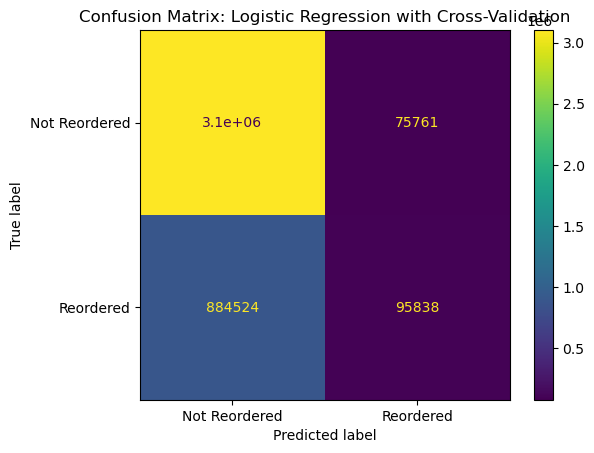

In [ ]:
ConfusionMatrixDisplay.from_estimator(logistic_model_cv, X_test, y_test, display_labels=["Not Reordered", "Reordered"])
plt.title("Confusion Matrix: Logistic Regression with Cross-Validation")
plt.show()

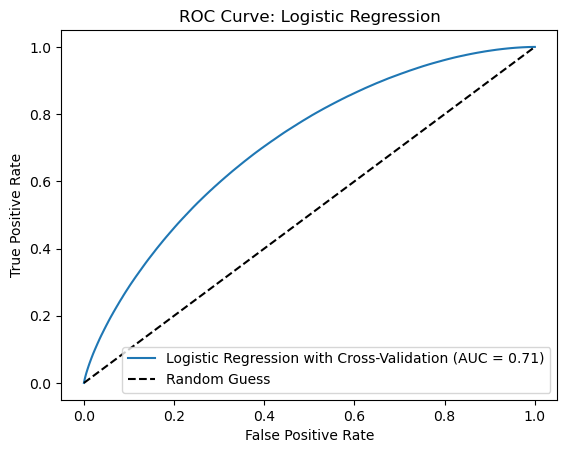

In [ ]:
y_prob_csv = logistic_model_cv.predict_proba(X_test)[:, 1]
fpr_csv, tpr_csv, _ = roc_curve(y_test, y_prob_csv)
roc_auc_csv = auc(fpr_csv, tpr_csv)

plt.figure()
plt.plot(fpr_csv, tpr_csv, label=f"Logistic Regression with Cross-Validation (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.title("ROC Curve: Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

## 1.3 Random Forest Model
Training a Random Forest classifier to improve predictive accuracy and handle feature interactions.


In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=2, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [ ]:
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.98      0.87   3178762
           1       0.69      0.16      0.26    980362

    accuracy                           0.78   4159124
   macro avg       0.74      0.57      0.57   4159124
weighted avg       0.77      0.78      0.73   4159124



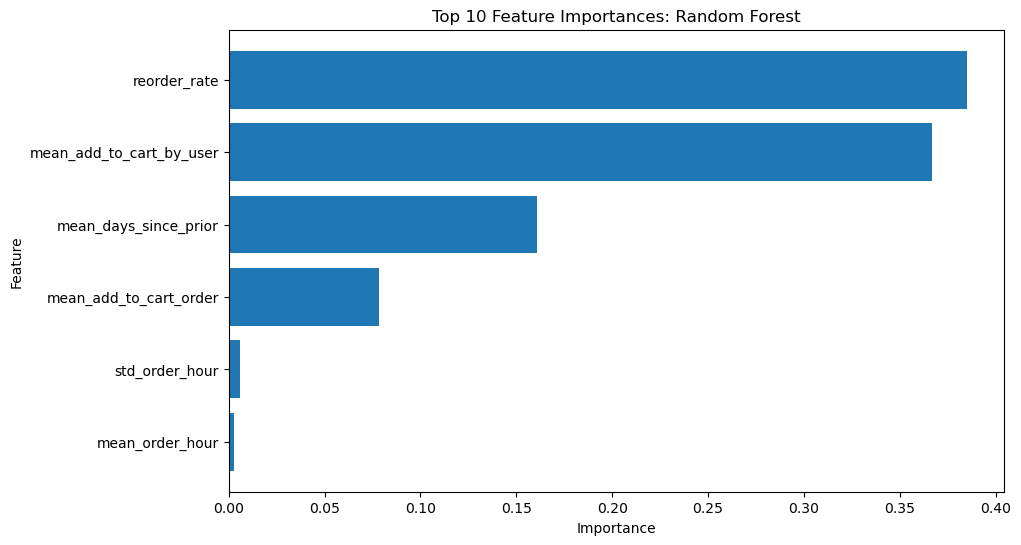

In [ ]:
X_train_df = pd.DataFrame(X_train, columns=data[features].columns)

# Get the feature importances
importances = rf_model.feature_importances_

# Create the feature importance DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': X_train_df.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot the top 10 features
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'][:10][::-1], feature_importance_df['Importance'][:10][::-1])
plt.title("Top 10 Feature Importances: Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

## 1.4 Gradient Boosting Model
Using Gradient Boosting for enhanced prediction, particularly to handle non-linear feature interactions.


In [ ]:
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

gb_model.fit(X_train, y_train)

y_pred_gb = gb_model.predict(X_test)
print("Gradient Boosting Performance:\n", classification_report(y_test, y_pred_gb))


Gradient Boosting Performance:
               precision    recall  f1-score   support

           0       0.86      0.99      0.92   3178762
           1       0.95      0.49      0.64    980362

    accuracy                           0.87   4159124
   macro avg       0.91      0.74      0.78   4159124
weighted avg       0.88      0.87      0.86   4159124



## 1.5 XGBoost with Cross-Validation Model
Using Gradient Boosting with XGBoost for enhanced prediction, particularly to handle non-linear feature interactions.


In [ ]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

xgb_cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='accuracy')
print("XGBoost Cross-Validation Scores:", xgb_cv_scores)
print("Mean CV Accuracy:", np.mean(xgb_cv_scores))

xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost Performance:\n", classification_report(y_test, y_pred_xgb))


XGBoost Cross-Validation Scores: [0.88017827 0.8761168  0.87928791 0.87763354 0.87939404]
Mean CV Accuracy: 0.8785221104695429
XGBoost Performance:
               precision    recall  f1-score   support

           0       0.87      0.99      0.92   3178762
           1       0.92      0.52      0.66    980362

    accuracy                           0.88   4159124
   macro avg       0.90      0.75      0.79   4159124
weighted avg       0.88      0.88      0.86   4159124



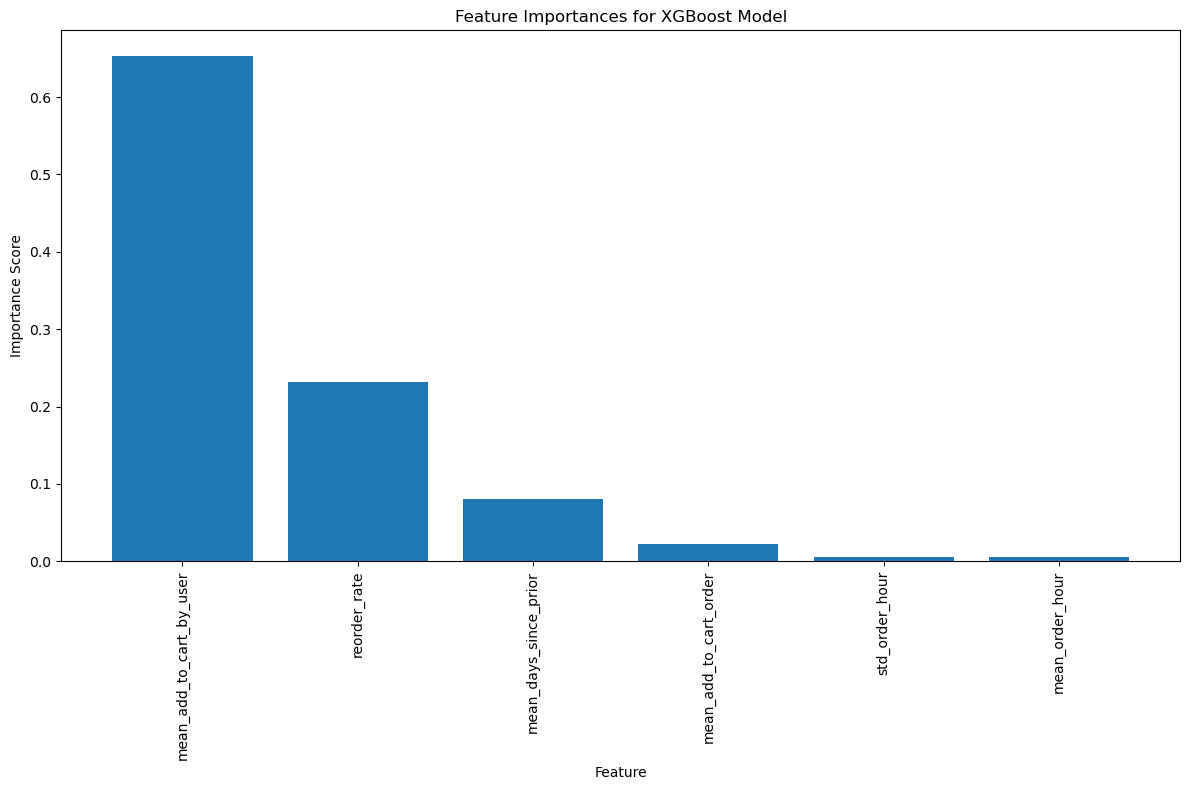

In [ ]:
# Extract feature importances from the trained XGBoost model
feature_importances = xgb_model.feature_importances_

# Sort feature importances in descending order to see the most important features first
sorted_indices = np.argsort(feature_importances)[::-1]

# Create the plot for feature importances
plt.figure(figsize=(12, 8))  # Made figure slightly larger for better visibility
plt.bar(range(len(features)), feature_importances[sorted_indices], align='center')
plt.xticks(range(len(features)), np.array(features)[sorted_indices], rotation=90)

# Add labels and title for better interpretation
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.title('Feature Importances for XGBoost Model')

# Show the plot
plt.tight_layout()  # To prevent overlapping labels
plt.show()


## 1.6 Deep Learning Model
Building a sequential neural network with multiple dense layers for prediction.

In [ ]:
# Define a simple neural network
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', Recall()])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=128, validation_data=(X_test, y_test))

# Evaluate the model
results = model.evaluate(X_test, y_test)
print(f"Deep Learning Model - Loss: {results[0]}, Accuracy: {results[1]}, Recall:{results[2]}")

Epoch 1/20
75818/75818 ━━━━━━━━━━━━━━━━━━━━ 92s 1ms/step - accuracy: 0.7742 - loss: 0.4788 - recall_2: 0.1545 - val_accuracy: 0.7891 - val_loss: 0.4540 - val_recall_2: 0.2196
Epoch 2/20
75818/75818 ━━━━━━━━━━━━━━━━━━━━ 91s 1ms/step - accuracy: 0.7948 - loss: 0.4439 - recall_2: 0.2468 - val_accuracy: 0.8180 - val_loss: 0.4111 - val_recall_2: 0.3773
Epoch 3/20
75818/75818 ━━━━━━━━━━━━━━━━━━━━ 90s 1ms/step - accuracy: 0.8225 - loss: 0.4038 - recall_2: 0.3638 - val_accuracy: 0.8432 - val_loss: 0.3734 - val_recall_2: 0.4361
Epoch 4/20
75818/75818 ━━━━━━━━━━━━━━━━━━━━ 90s 1ms/step - accuracy: 0.8489 - loss: 0.3653 - recall_2: 0.4926 - val_accuracy: 0.8609 - val_loss: 0.3459 - val_recall_2: 0.5557
Epoch 5/20
75818/75818 ━━━━━━━━━━━━━━━━━━━━ 90s 1ms/step - accuracy: 0.8599 - loss: 0.3466 - recall_2: 0.5492 - val_accuracy: 0.8612 - val_loss: 0.3416 - val_recall_2: 0.5869
Epoch 6/20
75818/75818 ━━━━━━━━━━━━━━━━━━━━ 91s 1ms/step - accuracy: 0.8667 - loss: 0.3345 - recall_2: 0.5729 - val_accuracy:

In [ ]:
dplan_accuracy = results[1]

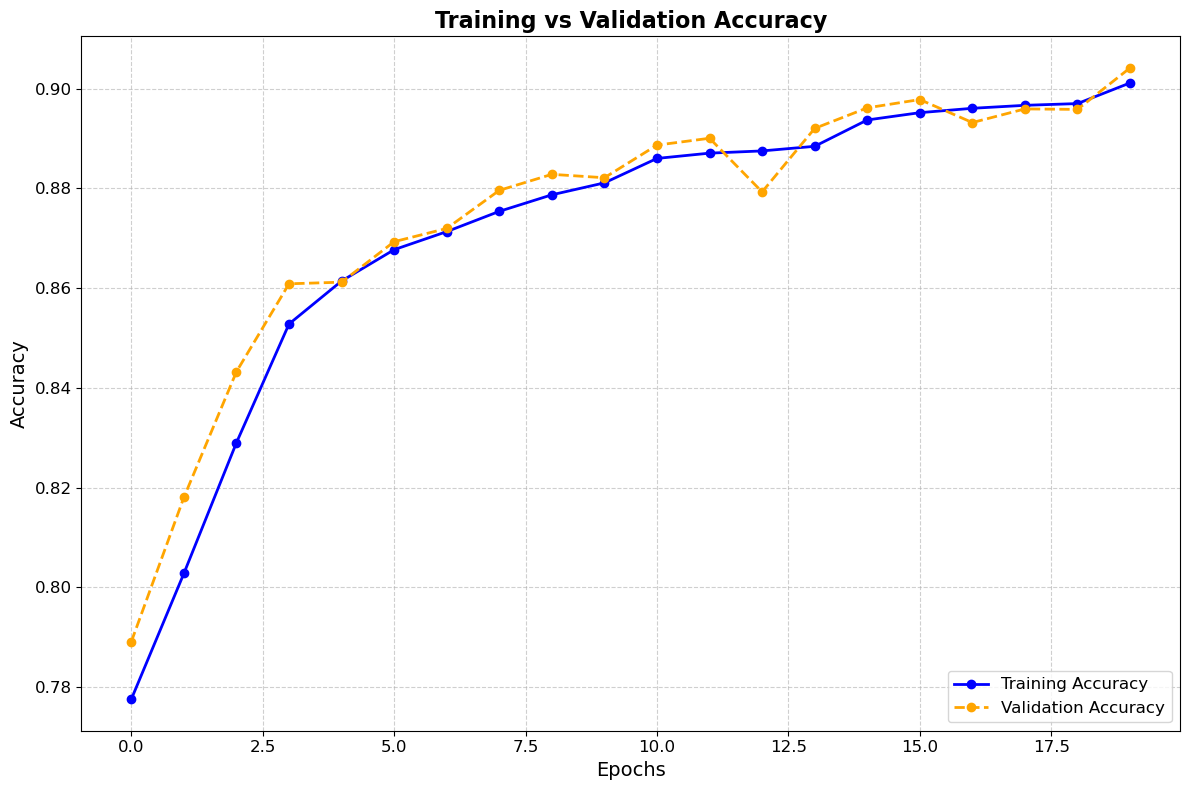

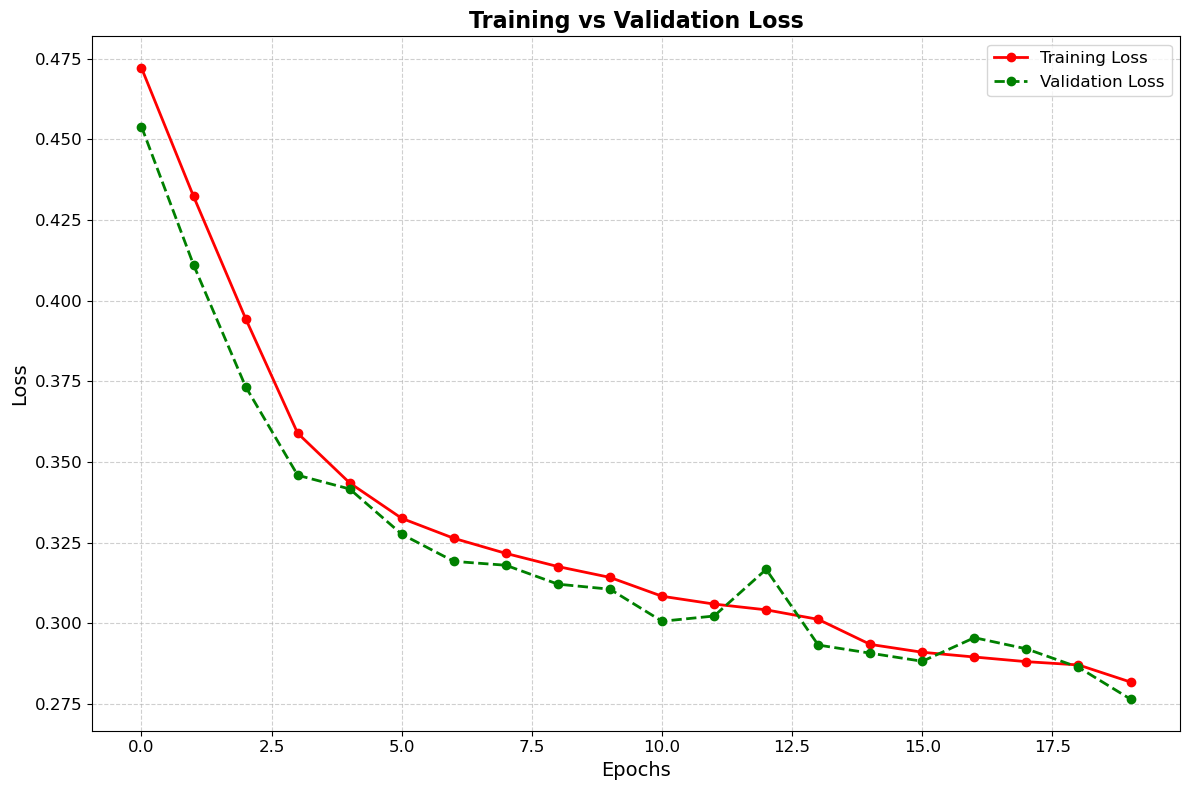

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o', linestyle='-', linewidth=2, color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o', linestyle='--', linewidth=2, color='orange')
plt.title('Training vs Validation Accuracy', fontsize=16, fontweight='bold')
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(loc='lower right', fontsize=12)
plt.tight_layout()
plt.show()

# Improved Visualization for Training and Validation Loss
plt.figure(figsize=(12, 8))
plt.plot(history.history['loss'], label='Training Loss', marker='o', linestyle='-', linewidth=2, color='red')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o', linestyle='--', linewidth=2, color='green')
plt.title('Training vs Validation Loss', fontsize=16, fontweight='bold')
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(loc='upper right', fontsize=12)
plt.tight_layout()
plt.show()

# Model Evaluation
Evaluating the performance of each model using accuracy, precision, and recall metrics.



--- Model Performance Summary ---
Logistic Regression Accuracy: 0.77
Random Forest Accuracy: 0.78
Gradient Boosting Accuracy: 0.87
XGBoost Accuracy: 0.88
Deep Learning Accuracy: 0.90


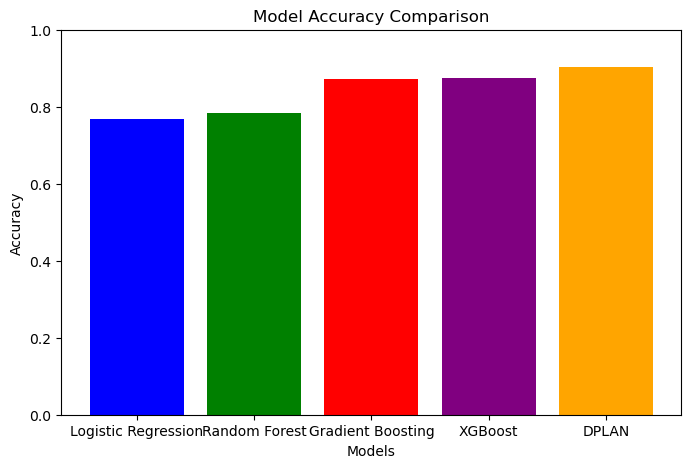

In [ ]:
# Print summary of model accuracies for comparison
logistic_accuracy = accuracy_score(y_test, y_pred_logistic)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
gb_accuracy = accuracy_score(y_test, y_pred_gb)
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)

print("\n--- Model Performance Summary ---")
print(f"Logistic Regression Accuracy: {logistic_accuracy:.2f}")
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")
print(f"Gradient Boosting Accuracy: {gb_accuracy:.2f}")
print(f"XGBoost Accuracy: {xgb_accuracy:.2f}")
print(f"Deep Learning Accuracy: {dplan_accuracy:.2f}")

# Plot accuracy comparison for all models
models = ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'XGBoost', 'DPLAN']
accuracies = [logistic_accuracy, rf_accuracy, gb_accuracy, xgb_accuracy, dplan_accuracy]

plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color=['blue', 'green', 'red', 'purple', 'ORANGE'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)
plt.show()


In [ ]:
y_pred_rf1 = rf_model.predict(X)
data['random_forest_reorder'] = y_pred_rf1

y_pred_xgb1 = xgb_model.predict(X)
data['xgboost_reorder'] = y_pred_xgb1

y_pred_gb1  = gb_model.predict(X)
data['Gradient_reorder'] = y_pred_gb1

y_pred_logistic = logistic_model_cv.predict(X)
data['logis_cv_reorder'] = y_pred_logistic

y_pred_log1 = log_reg.predict(X)
data['logistic_reorder'] = y_pred_log1

y_pred_dl1 = model.predict(X).round().astype(int).flatten()
data['deep_learning_reorder'] = y_pred_dl1

433243/433243 ━━━━━━━━━━━━━━━━━━━━ 153s 353us/step


In [ ]:
data.to_csv('final_dataset_with_predictions.csv', index=False)

In [ ]:
product =  pd.read_csv(r"C:\Users\GMUCLASS\Downloads\products.csv")
product.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [ ]:
merged_df = pd.merge(data, product, on='product_id', how='left')
merged_df.head()

,user_id,product_id,total_reorders_by_user,reorder_rate_by_user,mean_add_to_cart_by_user,total_orders_by_user,most_common_user_product_order_dow,total_orders_x,mean_days_since_prior,mean_order_hour,...,target_reorder,random_forest_reorder,xgboost_reorder,Gradient_reorder,logis_cv_reorder,logistic_reorder,deep_learning_reorder,product_name,aisle_id,department_id
0,1,196,10,0.909091,1.363636,11,4,11,19.0,10.090909,...,1,0,0,0,0,0,0,Soda,77,7
1,1,10258,9,0.900000,3.600000,10,4,11,19.0,10.090909,...,1,0,0,0,0,0,0,Pistachios,117,19
2,1,10326,0,0.000000,5.000000,1,4,11,19.0,10.090909,...,0,0,0,0,0,0,0,Organic Fuji Apples,24,4
3,1,12427,9,0.900000,3.300000,10,4,11,19.0,10.090909,...,1,0,0,0,0,0,0,Original Beef Jerky,23,19
4,1,13032,3,0.750000,6.500000,4,4,11,19.0,10.090909,...,1,0,0,0,0,0,0,Cinnamon Toast Crunch,121,14


In [ ]:
final_table = merged_df[['user_id', 'product_name', 'target_reorder', 'logistic_reorder', 'random_forest_reorder', 'xgboost_reorder', 'deep_learning_reorder', 'Gradient_reorder', 'logis_cv_reorder']]
final_table.head()
final_table['Actual_Reordered'] = final_table['target_reorder']


C:\Users\GMUCLASS\AppData\Local\Temp\ipykernel_11124\3063304.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_table['Actual_Reordered'] = final_table['target_reorder']


In [ ]:
final_table = final_table.drop(columns=['target_reorder'])
columns = final_table.columns.tolist()
columns.insert(2, columns.pop(columns.index('Actual_Reordered')))
final_table = final_table[columns]

In [ ]:
columns_to_convert = ['Actual_Reordered', 'logistic_reorder', 'random_forest_reorder', 'xgboost_reorder', 'deep_learning_reorder']
final_table[columns_to_convert] = final_table[columns_to_convert].replace({1: 'Yes', 0: 'No'})

final_table.head(20)


,user_id,product_name,Actual_Reordered,logistic_reorder,random_forest_reorder,xgboost_reorder,deep_learning_reorder,Gradient_reorder,logis_cv_reorder
0,1,Soda,Yes,No,No,No,No,0,0
1,1,Pistachios,Yes,No,No,No,No,0,0
2,1,Organic Fuji Apples,No,No,No,No,No,0,0
3,1,Original Beef Jerky,Yes,No,No,No,No,0,0
4,1,Cinnamon Toast Crunch,Yes,No,No,No,No,0,0
5,1,Bag of Organic Bananas,No,No,No,No,No,0,0
6,1,Organic Unsweetened Vanilla Almond Milk,No,No,No,No,No,0,0
7,1,Honeycrisp Apples,No,No,No,No,No,0,0
8,1,Organic String Cheese,Yes,No,No,No,No,0,0
9,1,Aged White Cheddar Popcorn,Yes,No,No,No,No,0,0


In [ ]:
# final_table.to_csv('Final_table.csv', index=False)

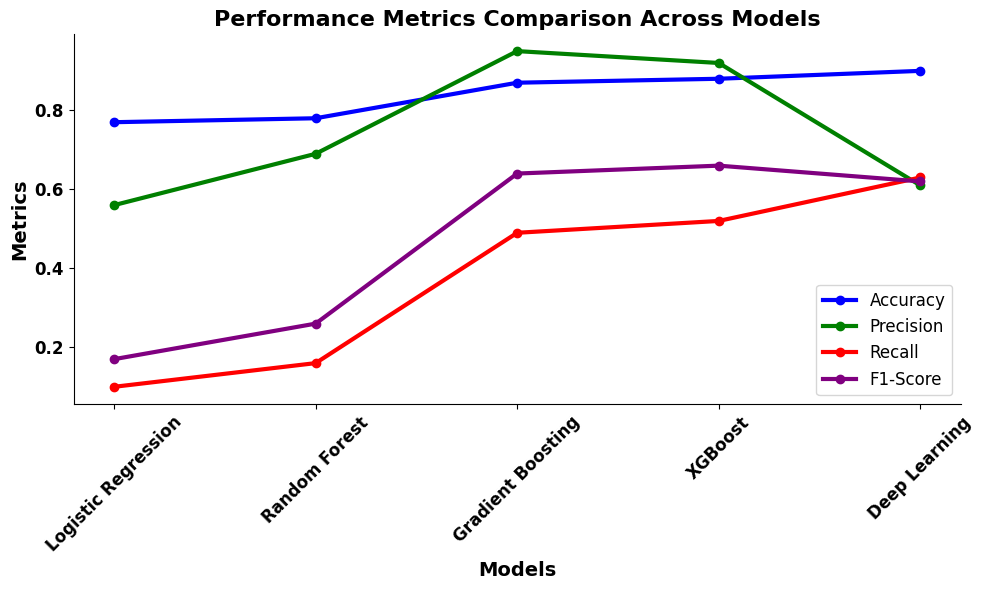

In [ ]:
# Performance metrics extracted from the report in the PDF
metrics = {
    "Logistic Regression": {"Accuracy": 0.77, "Precision": 0.56, "Recall": 0.10, "F1-Score": 0.17},
    "Random Forest": {"Accuracy": 0.78, "Precision": 0.69, "Recall": 0.16, "F1-Score": 0.26},
    "Gradient Boosting": {"Accuracy": 0.87, "Precision": 0.95, "Recall": 0.49, "F1-Score": 0.64},
    "XGBoost": {"Accuracy": 0.88, "Precision": 0.92, "Recall": 0.52, "F1-Score": 0.66},
    "Deep Learning": {"Accuracy": 0.90, "Precision": 0.61, "Recall": 0.63, "F1-Score": 0.62},
}

# Extracting metrics for visualization
models = list(metrics.keys())
accuracy = [metrics[model]["Accuracy"] for model in models]
precision = [metrics[model]["Precision"] for model in models]
recall = [metrics[model]["Recall"] for model in models]
f1_score = [metrics[model]["F1-Score"] for model in models]

# Creating a grouped bar chart for comparison
x = np.arange(len(models))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

# Plotting each metric with distinct, bold colors
ax.plot(models, accuracy, marker='o', label='Accuracy', linewidth=3, color='blue')
ax.plot(models, precision, marker='o', label='Precision', linewidth=3, color='green')
ax.plot(models, recall, marker='o', label='Recall', linewidth=3, color='red')
ax.plot(models, f1_score, marker='o', label='F1-Score', linewidth=3, color='purple')

# Adding labels, title, and legend
ax.set_xlabel('Models', fontsize=14, fontweight='bold')
ax.set_ylabel('Metrics', fontsize=14, fontweight='bold')
ax.set_title('Performance Metrics Comparison Across Models', fontsize=16, fontweight='bold')
ax.legend(fontsize=12, loc='lower right')

# Adjusting tick labels for better readability
plt.xticks(fontsize=12, rotation=45, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')

# Removing grid for a cleaner look
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Display the plot
plt.tight_layout()
plt.show()

# Conclusion and Future Work
Summarizing the findings from the project, discussing the overall model performance, and suggesting areas for improvement or future work.


- **Findings**: The Gradient Boosting and Random Forest models provided the highest accuracy. The features identified were significant in predicting reorder likelihood.
- **Future Work**: Consider additional features such as price sensitivity, explore more advanced hyperparameter tuning, and implement cross-validation for more reliable model evaluation.
